In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.patches import Ellipse
import matplotlib.patches as patches
import librosa

%run graphing_function_recent.ipynb

In [2]:
#Use this for all adjustable values 
#input file paths here (include .csv):
video_path = r'\\10.25.16.5\yaochen\Active\DLC\Final_Models\Hanna\escape_behavior_HannaJachna_2024-07-8\Tested_V2\coords_csv\CoordM3_P2_6_18_24_videoDLC_resnet50_escape_behavior_2Jun13shuffle1_1030000_filtered_day.csv'
time_path = r'\\10.25.16.5\yaochen\Active\Lindsey\set_up_testing\V2\Timestamp\M3_P2_6_18_24_timestamp0.csv'
audio_path = r'\\10.25.16.5\yaochen\Active\Lindsey\set_up_testing\V2\Audio\M3_P2_6_18_24_audio.wav'

north_pixel = 19
south_pixel = 454
east_pixel = 566
west_pixel = 101
shelter_x_pixel = 535
shelter_y_pixel = 249

#input info from time_and_audio info notebook (either from audacity or bonsai)
stimulus_start = 629.6753299999974  #stimulus start time
stimulus_end = 637.2823299999974 #stimulus end time
escape_done = 631.5 #time mouse reaches shelter location 


In [3]:
#manually decide?
escape_response = True
freezing_response = False
#small_angle = 

In [4]:
#read in DLC data, convert to cm, center platform at 0,0
shelter_x, shelter_y, x_diam, y_diam, coord_scaled = single_mouse_data(north_pixel, south_pixel, east_pixel, west_pixel, shelter_x_pixel, shelter_y_pixel, video_path)

In [5]:
#replace any head, nose, or center points with likelihood < .9 with NA
filter_data(.8, coord_scaled)

In [6]:
#coord_filtered

In [7]:
coord_scaled

,Unnamed: 0,frames,nose_x,nose_y,nose_likelihood,head_x,head_y,head_likelihood,earRight_x,earRight_y,...,spine1_likelihood,center_x,center_y,center_likelihood,spine2_x,spine2_y,spine2_likelihood,spine3_x,spine3_y,spine3_likelihood
0,0,0,NaN,NaN,0.010986,NaN,NaN,0.005817,-30.592121,-0.181107,...,0.000441,NaN,NaN,0.011105,2.343003,30.223221,0.001795,-29.989595,0.551218,0.012909
1,1,1,NaN,NaN,0.013213,NaN,NaN,0.007132,-30.592121,-0.181107,...,0.000509,NaN,NaN,0.013677,2.443159,30.282645,0.006701,-29.989595,0.585229,0.009006
2,2,2,NaN,NaN,0.013301,NaN,NaN,0.007964,-30.592121,-0.181107,...,0.000570,NaN,NaN,0.013882,2.443159,30.314322,0.006033,-29.989595,0.585229,0.011564
3,3,3,NaN,NaN,0.009942,NaN,NaN,0.006091,-30.612626,-0.242606,...,0.000412,NaN,NaN,0.009773,2.474486,30.314322,0.014185,-30.124275,0.585229,0.035409
4,4,4,NaN,NaN,0.009204,NaN,NaN,0.005953,-30.612626,-0.271747,...,0.000340,NaN,NaN,0.008030,2.474486,30.314322,0.021479,-30.147470,0.585229,0.050148
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16419,16419,16419,-18.513755,22.933419,0.999946,-19.864742,21.643521,0.999969,-20.809748,22.105631,...,0.999976,-21.160088,17.795244,0.999992,-21.329439,15.633116,0.999988,-21.200087,13.521489,0.999996
16420,16420,16420,-18.513755,22.775447,0.999937,-19.864742,21.634260,0.999966,-20.763186,22.086969,...,0.999978,-21.168649,17.750917,0.999991,-21.364642,15.566326,0.999985,-21.251345,13.417900,0.999996
16421,16421,16421,-18.611379,22.755342,0.999931,-19.884396,21.625128,0.999950,-20.740900,22.027039,...,0.999971,-21.168649,17.731557,0.999991,-21.364642,15.566326,0.999982,-21.230405,13.417900,0.999997
16422,16422,16422,-18.625381,22.582840,0.999911,-19.907678,21.536799,0.999950,-20.763186,21.989213,...,0.999966,-21.168649,17.678136,0.999991,-21.376530,15.524815,0.999986,-21.251345,13.399268,0.999997


In [8]:
#convert timestamps to zeroed seconds
convert_time(time_path, coord_scaled)

In [9]:
#REPLACE ONCE WE HAVE STIMULUS TIMESTAMPS
#returns start and stop times of stimulus.
start, stimulus_end = audio_timing(stimulus_start, stimulus_end, audio_path, coord_scaled['time'].iloc[-1])

In [10]:
#find time stimulus ends and mouse reaches shelter(escape) if stimulus is set to 0s
end, escape = time_set_zero(start, stimulus_end, escape_done, coord_scaled)

In [11]:
#calculate displacement as 'displacement'
displacement(shelter_x, shelter_y, coord_scaled)

In [12]:
#calculate speed as 'speed' and change in displacement as 'delta_vector'
total_distance = speed(coord_scaled)

In [13]:
#calculate head angle as 'head_angle'
angle(shelter_x, shelter_y, coord_scaled)

In [14]:
#calculate head angle speed as 'angle_speed'
angle_speed(coord_scaled)

In [15]:
#create dataframes isolated to 4 ranges: just shelter reaching, 3 seconds before and 6 after, 2 before and 4 after, and 1 where you can input your own parameters
#return 4 dataframes 
escape_only, four_second, six_second, long_range = dataframe_ranges(-15, 30, escape,coord_scaled)

<module 'matplotlib.pyplot' from 'C:\\anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

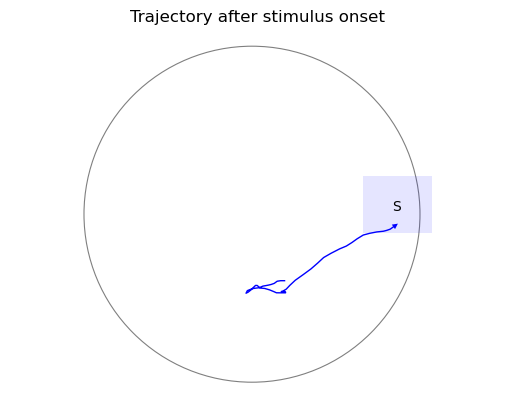

In [16]:
trajectory(shelter_x, shelter_y, x_diam, y_diam, escape_only)

<module 'matplotlib.pyplot' from 'C:\\anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

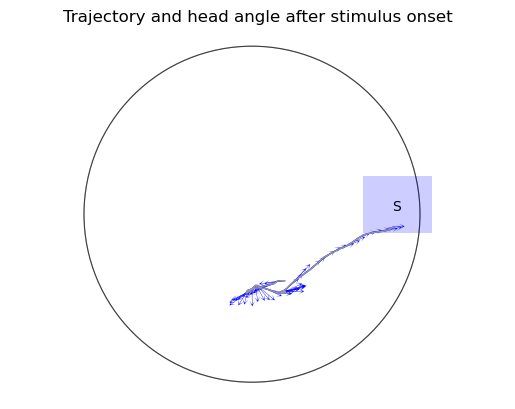

In [17]:
head_angle_trajectory_figure(shelter_x, shelter_y, x_diam, y_diam, escape_only)

<module 'matplotlib.pyplot' from 'C:\\anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

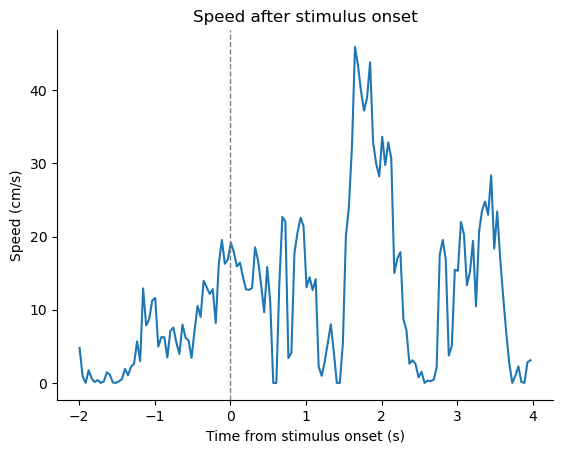

In [18]:
speed_figure(four_second['time_set'].iloc[-1],4, four_second)

<module 'matplotlib.pyplot' from 'C:\\anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

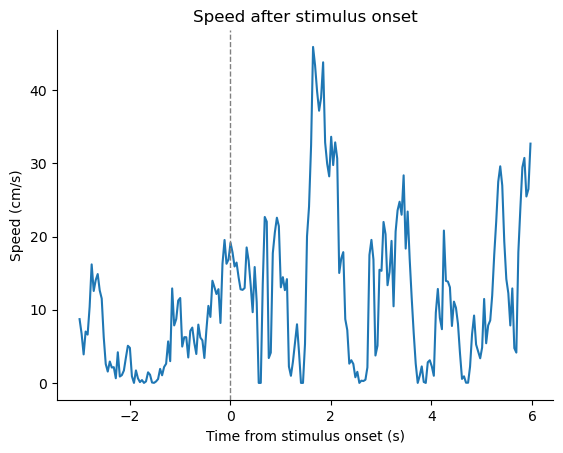

In [19]:
speed_figure(six_second['time_set'].iloc[-1],4, six_second)


<module 'matplotlib.pyplot' from 'C:\\anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

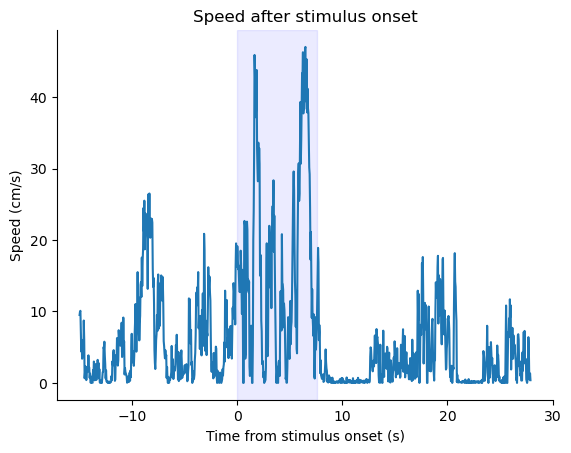

In [20]:
speed_figure(end,9, long_range)

<module 'matplotlib.pyplot' from 'C:\\anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

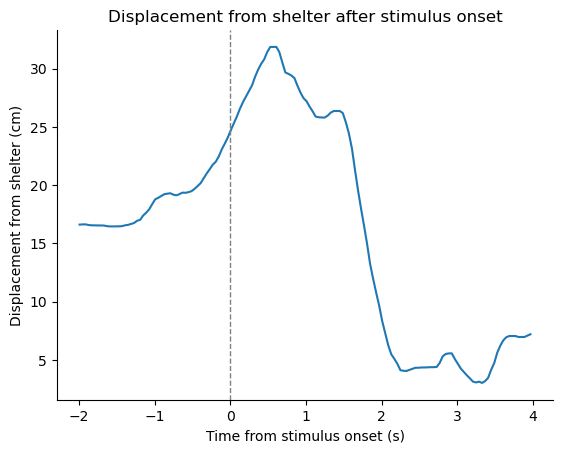

In [21]:
displacement_figure(four_second['time_set'].iloc[-1],4, four_second)

<module 'matplotlib.pyplot' from 'C:\\anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

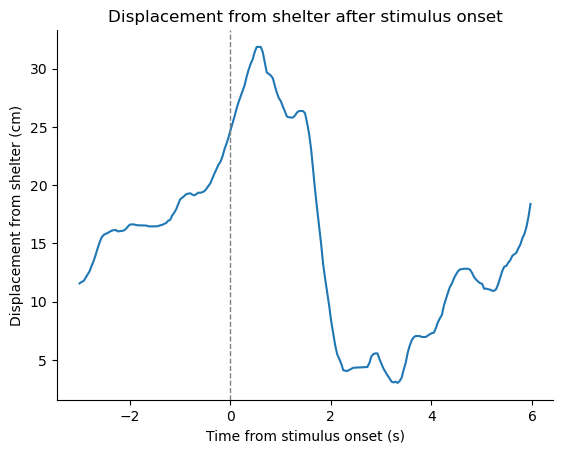

In [22]:
displacement_figure(six_second['time_set'].iloc[-1],4, six_second)

<module 'matplotlib.pyplot' from 'C:\\anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

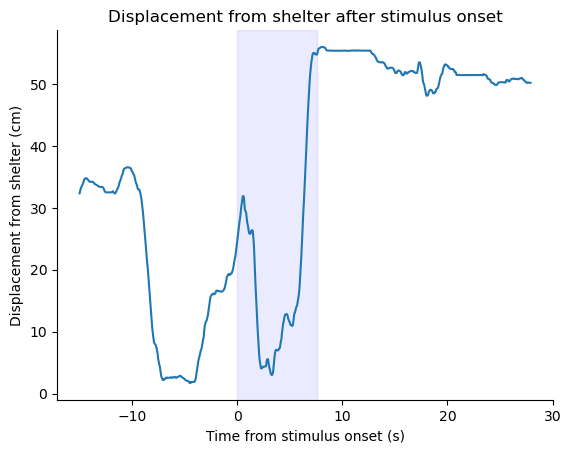

In [23]:
displacement_figure(end,9, long_range)

<module 'matplotlib.pyplot' from 'C:\\anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

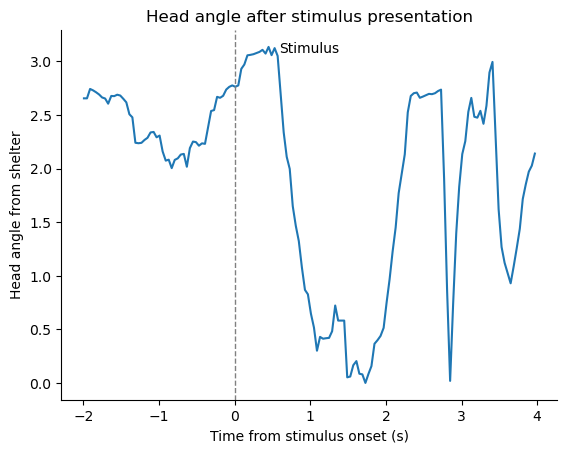

In [24]:
head_angle_figure(four_second['time_set'].iloc[-1],4, four_second)

<module 'matplotlib.pyplot' from 'C:\\anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

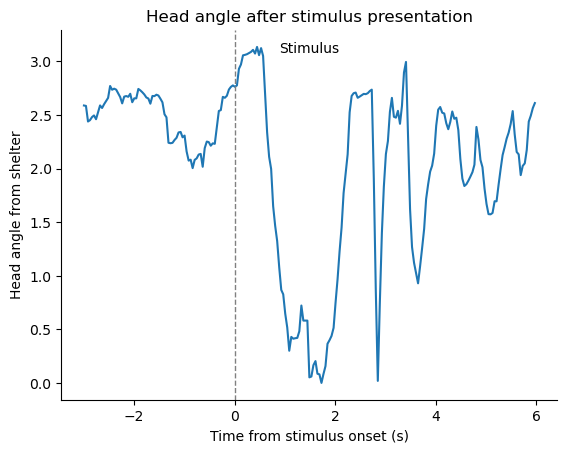

In [25]:
head_angle_figure(six_second['time_set'].iloc[-1],4, six_second)

<module 'matplotlib.pyplot' from 'C:\\anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

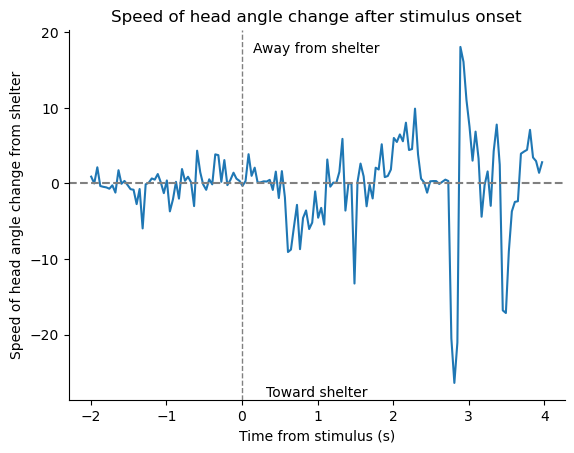

In [26]:
angle_speed_figure(four_second['time_set'].iloc[-1], 4,four_second)

In [27]:
ratio, initial_displacement, total_distance = linearity_ratio(escape_only)

In [28]:
#shelter_rotation(shelter_x, shelter_y, escape_only)

In [29]:
escape_only

,Unnamed: 0,frames,nose_x,nose_y,nose_likelihood,head_x,head_y,head_likelihood,earRight_x,earRight_y,...,spine3_x,spine3_y,spine3_likelihood,time,time_set,displacement,speed,delta_vector,head_angle,angle_speed
15726,15726,15726,0.157473,-12.350676,0.999973,1.998228,-12.095994,0.999966,2.138734,-13.167898,...,10.488683,-11.495318,0.999977,629.195059,0.007399,24.742093,19.137973,0.764045,2.763457,-0.316527
15727,15727,15727,-0.570934,-12.641952,0.999944,1.375246,-12.353569,0.999974,1.599875,-13.535030,...,9.744506,-11.495318,0.999993,629.235072,0.047412,25.336791,17.827068,0.713314,2.775970,0.312734
15728,15728,15728,-1.076073,-13.300029,0.999942,0.802582,-12.712782,0.999985,1.143178,-13.834666,...,8.932012,-11.516315,0.999996,629.275072,0.087412,25.918287,15.913204,0.636528,2.930737,3.869170
15729,15729,15729,-1.590776,-13.841243,0.999885,0.248170,-13.174882,0.999928,0.534143,-14.230111,...,8.201647,-11.495318,0.999989,629.315085,0.127425,26.574994,16.444785,0.658005,2.971104,1.008851
15730,15730,15730,-1.771020,-14.544873,0.999920,-0.137116,-13.767945,0.999958,0.202195,-14.721001,...,7.634768,-11.487931,0.999998,629.356096,0.168436,27.150789,14.404178,0.590730,3.056777,2.089029
15731,15731,15731,-2.254244,-14.951442,0.999923,-0.566410,-14.133298,0.999971,-0.057681,-15.122944,...,7.021875,-11.487931,0.999998,629.395213,0.207553,27.624551,12.791532,0.500366,3.061117,0.110930
15732,15732,15732,-2.795669,-15.209118,0.999859,-1.092291,-14.374629,0.999993,-0.556486,-15.351548,...,6.604266,-11.397155,0.999996,629.435072,0.247412,28.098369,12.715278,0.506818,3.067136,0.151011
15733,15733,15733,-3.099378,-15.670138,0.999928,-1.542631,-14.621565,0.999996,-0.901397,-15.570475,...,5.968245,-11.363929,0.999981,629.475136,0.287476,28.580668,12.967844,0.519544,3.078372,0.280454
15734,15734,15734,-3.675945,-15.828983,0.999735,-2.141581,-15.033677,0.999986,-1.488954,-15.984089,...,5.163777,-11.363929,0.999998,629.515110,0.327450,29.314378,18.514114,0.740083,3.088650,0.257124
15735,15735,15735,-4.253717,-16.362510,0.999945,-2.645751,-15.342711,0.999972,-1.998140,-16.203972,...,4.555628,-11.363929,0.999997,629.555136,0.367476,29.925567,16.696908,0.668310,3.107868,0.480122


In [30]:
likelihood_data, likelihood_minus_nose, likelihood_center = likelihood_check(0, 8, .9, coord_scaled)

In [31]:
likelihood_data #need to adjust time frame to be useful 

,Unnamed: 0,frames,nose_x,nose_y,nose_likelihood,head_x,head_y,head_likelihood,earRight_x,earRight_y,...,spine3_x,spine3_y,spine3_likelihood,time,time_set,displacement,speed,delta_vector,head_angle,angle_speed
15774,15774,15774,22.853594,-3.078695,0.694784,21.654869,-3.587943,0.999997,21.149551,-2.773156,...,14.070031,-6.369797,0.999990,631.115738,1.928078,10.780508,29.968997,1.204514,0.439191,0.986317
15783,15783,15783,30.272803,-2.119371,0.666972,29.483021,-1.909530,0.999984,29.645622,-0.882642,...,21.885608,-2.568388,0.999998,631.475814,2.288154,4.071590,8.714945,0.344467,2.524857,9.894207
15784,15784,15784,30.547005,-2.441151,0.558333,29.678058,-2.070389,0.999976,29.772097,-1.200318,...,22.191471,-2.568388,0.999997,631.515648,2.327988,4.052654,7.224659,0.287787,2.677815,3.839902
15789,15789,15789,31.183297,-2.931645,0.897671,30.061093,-2.454275,0.999996,30.150032,-1.543988,...,22.343439,-2.545972,0.999994,631.715853,2.528193,4.354810,1.517672,0.059950,2.684576,0.317992
15790,15790,15790,31.171279,-2.931645,0.897835,30.104946,-2.467728,0.999995,30.180850,-1.557402,...,22.441498,-2.527718,0.999993,631.755699,2.568039,4.354810,0.000000,0.000000,2.697105,0.314419
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15921,15921,15921,-28.377777,-1.530667,0.016140,-31.605722,2.278779,0.470051,-32.155447,1.670900,...,-26.213478,-2.569083,0.999999,636.997158,7.809498,55.763321,8.116590,0.317075,0.858780,-0.345008
15922,15922,15922,-28.448172,-1.333613,0.016614,-31.606006,2.286025,0.172889,-32.159773,1.680653,...,-26.324291,-2.456877,0.999999,637.037133,7.849473,55.803614,7.094434,0.283600,0.844245,-0.363597
15923,15923,15923,-28.518567,-1.136560,0.015000,-31.606291,2.293270,0.270199,-32.159773,1.799971,...,-26.383283,-2.357193,0.999999,637.077030,7.889370,55.857998,1.371401,0.054715,0.828530,-0.393908
15924,15924,15924,-28.588961,-0.939507,0.014421,-31.606575,2.300516,0.196529,-32.159773,1.880918,...,-26.492599,-2.262844,0.999999,637.117043,7.929383,55.931111,3.189576,0.127625,0.811490,-0.425850
